# TP 3 : Récursivité

Dans ce TP, nous allons voir :

- une fonction qui se définit aussi bien récursivement qu'itérativement ;
- une fonction à qui la récursivité ne réussit pas...
- un problème auquel on peut trouver facilement une solution récursive (mais bon courage pour trouver une version itérative).

Tout d'abord, remarquons que la dichotomie (du TP précédent) peut très bien s'écrire sous la forme d'**une fonction qui s'appelle elle-même** :

c'est le principe même de la **récursivité**.

In [1]:
# dichotomie version recursive

EPSILON = 0.001

def dichotomie(fun, a, b):
    m = (a + b) / 2
    if (b - a) < EPSILON:
        return m
    if fun(a) * fun(m) > 0:
        return dichotomie(fun, m, b)
    else:
        return dichotomie(fun, a, m)

De manière générale :
- on utilise la même fonction pour trouver une solution à **une version plus simple du même problème** (ici un intervalle de recherche plus petit),
- et avec **une condition d'arrêt** (ici la taille de l'intervalle inférieure à $\epsilon$).

#### **Exercice 1 : version itérative de la fonction factorielle**

La factorielle d'un entier naturel $n$ est le produit des nombres entiers strictement positifs inférieurs ou égaux à $n$.

Elle se note $n!$ et se définit ainsi :
$$n! = \prod_{i=1}^{n}{i} = 1 \times 2 \times 3 \times \cdots \times (n-1) \times n$$

Bien sûr, on peut écrire une fonction `factorielle` en suivant cette définition, avec une simple boucle.

À vous de jouer :

In [2]:
def factorielle(n):
    res = 1
    # à compléter
    # solution
    for i in range(1, n+1):  # attention à range() en Python, qui s'arrête avant la deuxième borne
        res *= i
    return res

In [3]:
factorielle(5)  # si tout va bien, cela devrait faire 120

120

#### **Exercice 2 : version récursive de la fonction factorielle**

Il existe aussi une définition par récurrence de la factorielle :
$$0! = 1 \text{ et }
\forall n > 0, n! = n \times (n – 1)!$$

et on peut alors écrire une version récursive de la fonction `factorielle`

(attention à ne pas oublier la condition d'arrêt - le cas de base $n = 0$).

À vous de jouer :

In [4]:
def factorielle(n):
    # cas de base
    if n == 0:
        return 1
    # récursion
    return n * factorielle(n-1)

In [5]:
factorielle(5)

120

#### **Exercice 3 : version récursive de la suite de Fibonacci**

La suite de Fibonacci est une suite d'entiers dans laquelle chaque terme est la somme des deux termes qui le précèdent.

Elle commence par les termes 1 et 1 si on part de l'indice 1.

Elle est donc définie par :
$$F_1 = 1, F_2 = 1, \text{ et } \forall n \ge 3, F_n = F_{n-1} + F_{n-2}$$
et on obtient successivement les termes :
$$1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, \dots$$

Nous allons écrire une version récursive de la fonction `fibonacci` en suivant cette définition.

Et nous allons compter le nombre des appels (récursifs) à la fonction, grâce au module suivant (ligne suivante à exécuter) :

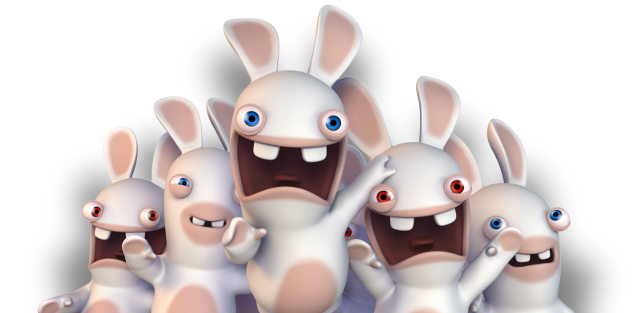

In [6]:
from lapins import *

La suite porte le nom de Leonardo Fibonacci qui, dans un ouvrage publié en 1202, a décrit la croissance d'une population de lapins :

$F_n$ est le nombre de paires de lapins au $n$-ième mois, sachant que :
- on part d'un seul couple de lapins ($F_1$),
- les lapins mettent $2$ mois pour pouvoir se reproduire,
- chaque couple de lapins adultes peut engendrer chaque mois un autre couple de petits lapins.

Évidemment, tous ces lapins de la même famille qui se reproduisent entre eux n'est pas vraiment recommandé...

Le module (crétin) précédent permet de compter le nombre d'appels à une fonction donnée, ainsi :
- placer le décorateur ```@compte``` devant la fonction dont il faudra compter les appels,
- puis exécuter le code que vous voulez,
- et finalement, appeler ```combien(...)``` pour afficher le compte (et remettre le compteur à zéro).

In [7]:
@compte
def bwaaah():
    print('bwaaah!')

bwaaah()
bwaaah()
bwaaah()
bwaaah()
bwaaah()

print("combien d'appels à la fonction bwaaah ? facile :")
combien(bwaaah)

bwaaah!
bwaaah!
bwaaah!
bwaaah!
bwaaah!
combien d'appels à la fonction bwaaah ? facile :
bwaaaaah! ( 5 )


5

Bon, maintenant à vous de jouer !

Écrivez une version récursive de la fonction `fibonacci` en complétant le code suivant :

In [8]:
@compte
def fibonacci(n):
    # cas de base
    if n == 1 or n == 2:
        return 1
    # récursion
    return fibonacci(n-1)+fibonacci(n-2)

In [9]:
fibonacci(13)  # si tout va bien, cela devrait faire 233

233

In [10]:
combien(fibonacci)  # combien d'appels à la fonction en tout ?

bwaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaah! ( 465 )


465

La complexité de la solution récursive est exponentielle (pas bien...).

#### **Exercice 4 : version itérative de la suite de Fibonacci**

Comme pour passer au terme suivant il suffit d'additionner les deux termes précédents, en mémorisant ces derniers et avec une simple boucle, il est possible d'écrire une version itérative, bien moins complexe.

Ainsi, complétez le code suivant :

In [31]:
# cette fois il n'y aura qu'un appel de fonction,
# mais nous allons compter les tours de boucle...

@compte
def tour():
    return

def fibonacci(n):
    f_n1,f_n2 = 1,1
    while n >= 3:
        tour()  # un tour de boucle de plus...
        # à compléter
        f_n1,f_n2 =f_n2, f_n1 + f_n2
        n -= 1
    return f_n2

# autre solution
def fibonacci2(n) :
    f_n1,f_n2 = 1,1
    for i in range(3,n+1) : 
        tour()
        f_n1, f_n2 = f_n2, f_n1+f_n2
    return f_n2

In [32]:
fibonacci2(13)

233

In [33]:
combien(tour)  # combien de tours de boucle en tout ?

bwaaaaaaaaaaah! ( 11 )


11

La complexité de la solution itérative est linéaire (bien !).

#### **Exercice 5 : les tours de Hanoï**

Les tours de Hanoï sont un jeu de réflexion publié par le mathématicien français Édouard Lucas en 1889, consistant à déplacer des disques (troués) de diamètres différents d'une tour de départ à une tour d'arrivée en passant par une tour intermédiaire, et ceci en un minimum de coups, tout en respectant les règles suivantes :
- on ne peut déplacer plus d'un disque à la fois ;
- on ne peut pas placer un disque sur un autre disque plus petit que lui.

On identifiera les tours par des numéros (1, 2 ou 3).

L'objectif est donc de faire passer $n$ disques initialement empilés (par diamètre décroissant) sur la tour 1 vers la tour 3 (la tour 2 pouvant servir d'intermédiaire).

Cette fois, nous avons affaire à un problème complexe.

Et il est extrêmement difficile de trouver une solution itérative à ce problème.

Mais l'algorithme suivant donne une solution récursive pour déplacer $n$ disques de la tour `src` à la tour `dst` :
- on déplace $n-1$ disques de la tour source `src` à la tour intermédiaire `tmp`
- le dernier disque (le plus grand) est donc libre : on le déplace vers la tour destination `dst`
- on re-déplace les $n-1$ disques de la tour intermédiaire `tmp` à la tour destination `dst`.

<img src="hanoi.png" width="400" height="200">

Mais comment déplacer $n-1$ disques de `a` vers `b` ?  Facile, récursivement : ```hanoi(a, b, n-1)```

Et comment trouver le numéro de la tour intermédiaire ?  Facile aussi : ```tmp = 6 - (src + dst)```

Et bien sûr, si le nombre de disques est 0, il n'y a rien à faire...

Pour déplacer un disque, pour l'instant on se contentera d'afficher les informations :

In [28]:
def deplacer_disque(src, dst):
    print(src, '->', dst)£

et maintenant, à vous d'écrire la fonction `hanoi` :

In [34]:
def hanoi(src, dst, n):
    if n > 0: # sinon il n'y a rien à faire
        # tour intermédiaire (formule magique...)
        tmp = 6 - (src + dst)
        # on déplace n-1 disques de la tour src à la tour tmp
        hanoi(src, tmp, n-1)
        # on est maintenant libres de déplacer un disque de la tour src à la tour dst
        deplacer_disque(src, dst)
        # on re-déplace les n-1 disques de la tour tmp à la tour dst
        hanoi(tmp, dst, n-1)

Pour essayer la fonction :

In [35]:
n = 4  # le nombre de disques

In [4]:
hanoi(1, 3, n)

1 -> 2
1 -> 3
2 -> 3
1 -> 2
3 -> 1
3 -> 2
1 -> 2
1 -> 3
2 -> 3
2 -> 1
3 -> 1
2 -> 3
1 -> 2
1 -> 3
2 -> 3


Attention à ne pas prendre un trop grande valeur pour $n$, car il y aura $2^n-1$ déplacements de disques...

(et vous ne pourriez pas voir l'animation finale de ce TP, dommage!)

C'est donc une complexité exponentielle, mais dans ce cas il se trouve que c'est optimal : on ne peut pas faire mieux...

Pour $n = 64$, cela ferait combien de déplacements ?

Réponse :

In [37]:
C = 0  # à votre avis ?
C = 2**64-1  # solution
print(C)

18446744073709551615


et si un déplacement prend 1 seconde, cela fait, en milliards d'années (!!!) :

In [38]:
C//(3600*24*365*10**9)  # le résultat en milliards d'années...

584